#  What is the role of optimization algorithms in artificial neural networksK Why are they necessary

Optimization algorithms play a crucial role in training artificial neural networks. The primary objective during training is to minimize a chosen loss function by adjusting the model parameters (weights and biases). Optimization algorithms are necessary for efficiently navigating the high-dimensional parameter space to find the optimal set of parameters that minimize the loss.

#  Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms of convergence speed and memory requirement


Concept of Gradient Descent and Its Variants:
Gradient Descent:
Idea: Gradient descent is an iterative optimization algorithm that minimizes a function by adjusting its parameters in the direction opposite to the gradient of the function with respect to the parameters.
Procedure:
Compute the gradient of the loss function with respect to the parameters.
Update the parameters in the opposite direction of the gradient.
Repeat until convergence or a predefined number of iterations.
Variants of Gradient Descent:
Stochastic Gradient Descent (SGD):

Idea: Uses a single randomly chosen data point (or a small batch) to compute the gradient and update the parameters.
Tradeoff: High variance in parameter updates but computationally more efficient.
Mini-Batch Gradient Descent:

Idea: Uses a small random subset of the data (mini-batch) to compute the gradient and update the parameters.
Tradeoff: Balance between the efficiency of SGD and the stability of batch gradient descent.
Batch Gradient Descent:

Idea: Computes the gradient of the entire dataset to update the parameters.
Tradeoff: More stable updates but computationally expensive for large datasets.

 # Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow convergence, local minima<. How do modern optimizers address these challenges


Challenges Associated with Traditional Gradient Descent:
Slow Convergence:

Traditional gradient descent methods may converge slowly, especially in high-dimensional spaces.
Local Minima:

Getting stuck in local minima, saddle points, or plateaus can hinder convergence to the global minimum.
Modern Optimizers and Addressing Challenges:
Adam (Adaptive Moment Estimation):

Idea: Combines ideas from RMSprop and Momentum. Adapts the learning rates for each parameter and maintains exponentially decaying averages of past gradients.
Advantages: Efficient memory usage, adaptive learning rates, and momentum-like behavior.
RMSprop (Root Mean Square Propagation):

Idea: Adjusts the learning rates for each parameter based on the historical average of the squared gradients.
Advantages: Addresses the problem of rapidly decreasing learning rates in AdaGrad.
Adagrad (Adaptive Gradient Algorithm):

Idea: Adapts the learning rates for each parameter based on the historical sum of squared gradients.
Challenges: Can lead to overly aggressive learning rate reductions.

# Discuss the concepts of momentum and learning rate in the context of optimization algorithms. How do they impact convergence and model performance

Concepts of Momentum and Learning Rate:
Momentum:
Idea: Momentum is a method that accelerates SGD by adding a fraction of the previous update to the current update.
Effect: Helps overcome slow convergence and oscillations by maintaining a more consistent direction.
Learning Rate:
Idea: Learning rate determines the size of the steps taken during optimization. Too high a learning rate may cause divergence, while too low a learning rate may lead to slow convergence.
Adjustment: Learning rates can be fixed, decay over time, or adaptively adjusted by optimizers like Adam.
Impact on Convergence and Model Performance:
Momentum: Helps accelerate convergence, especially in the presence of noisy gradients, and may help escape local minima.

Learning Rate: Affects the size of parameter updates. Smaller learning rates can lead to more stable convergence, while larger learning rates may help escape local minima but risk overshooting the minimum.

# Q5 Explain the concept of Stochastic radient Descent (SD< and its advantages compared to traditional gradient descent. Discuss its limitations and scenarios where it is most suitable


Stochastic Gradient Descent (SGD):
Concept:
Idea: Stochastic Gradient Descent (SGD) is a variant of gradient descent where, instead of computing the gradient of the entire dataset, the gradient is computed for a single randomly chosen data point (or a small batch).
Advantages:
Computational Efficiency: Computationally more efficient than batch gradient descent, especially for large datasets.
Faster Convergence: Faster convergence as each update is based on a single or a few examples.
Limitations and Suitability:
High Variance: High variance in parameter updates due to the randomness of the selected data points.
Noisy Updates: The noise introduced by individual samples may cause oscillations in the optimization process.
Suitability:
Well-suited for large datasets where computing the gradient for the entire dataset is computationally expensive.
Can be suitable for online learning scenarios

# Q6 Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates. Discuss its benefits and potential drawbacks

Adam Optimizer:

Concept:

Idea: The Adam optimizer combines the benefits of momentum and adaptive learning rates.
Components:

Momentum Component: Maintains an exponentially decaying average of past gradients.

RMSprop Component: Maintains an exponentially decaying average of past squared gradients.

Adaptive Learning Rates: Adjusts learning rates for each parameter based on the moment estimates.
Benefits:

Adaptivity: Adaptive learning rates for each parameter.

Efficiency: Efficient memory usage.

Momentum: Momentum-like behavior helps in overcoming slow convergence.

Drawbacks:

Complexity: Adam has more hyperparameters compared to simpler optimizers.

Sensitivity: Sensitive to the choice of hyperparameters.

# Q7 Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning rates. ompare it with Adam and discuss their relative strengths and weaknesses.

RMSprop Optimizer:

Concept:

Idea: RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm.

Components:

Exponentially Decaying Average: Maintains an exponentially decaying average of past squared gradients.

Benefits:

Adaptivity: Adapts learning rates for each parameter based on the historical average of squared gradients.

Stability: Addresses the problem of rapidly decreasing learning rates in Adagrad.
Comparison with Adam:

Similarities:

Both adaptively adjust learning rates based on historical information.

Differences:

Moments: Adam includes momentum-like components, while RMSprop focuses solely on adaptive learning rates.
Memory Usage: RMSprop may use less memory compared to Adam due to fewer components.

Hyperparameters: Adam has more hyperparameters, potentially making it more sensitive to their choice.

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split

2023-11-22 11:27:11.396115: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 11:27:11.465341: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 11:27:11.465404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 11:27:11.466885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 11:27:11.475923: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 11:27:11.477071: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train_full,y_train_full),(x_test,y_test) = mnist.load_data()

In [6]:
x_valid,x_train = x_train_full[:5000]/255,x_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000]/255,y_train_full[5000:]/255

x_test = x_test/255

In [7]:
# create a validation data set from the training data
x_valid ,x_train = x_train_full[:5000]/255 , x_train_full[5000:]/255.
y_valid ,y_train = y_train_full[:5000] , y_train_full[5000:]/255

x_test = x_test/255

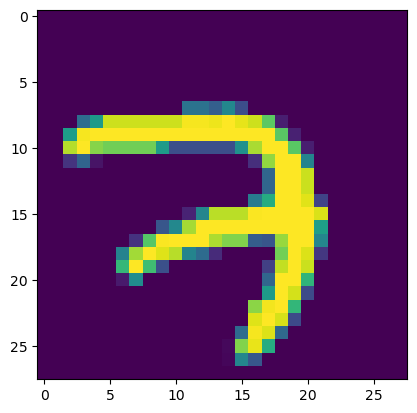

In [8]:
plt.imshow(x_train[0])

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
adam_history = model.fit(x_train,y_train,epochs=50,validation_split=0.2,verbose=0)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [13]:
sgd_history = model.fit(x_train,y_train,epochs=50,validation_split=0.2,verbose=0)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [15]:
rmsprop_history = model.fit(x_train,y_train,epochs=50,validation_split=0.2,verbose=0)

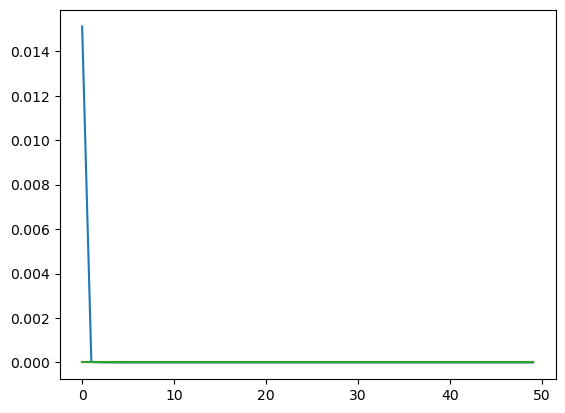

In [16]:
plt.plot(adam_history.history["loss"])
plt.plot(sgd_history.history["loss"])
plt.plot(rmsprop_history.history["loss"])

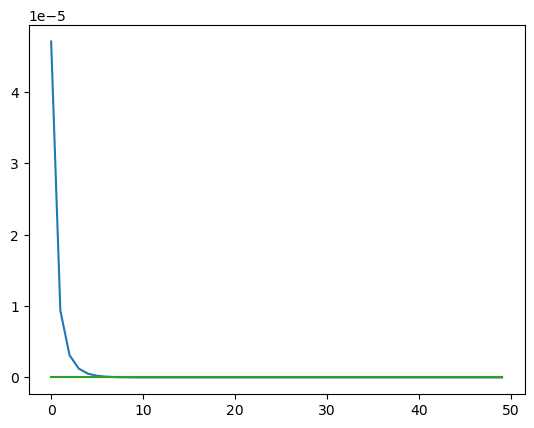

In [17]:
plt.plot(adam_history.history["val_loss"])
plt.plot(sgd_history.history["val_loss"])
plt.plot(rmsprop_history.history["val_loss"])

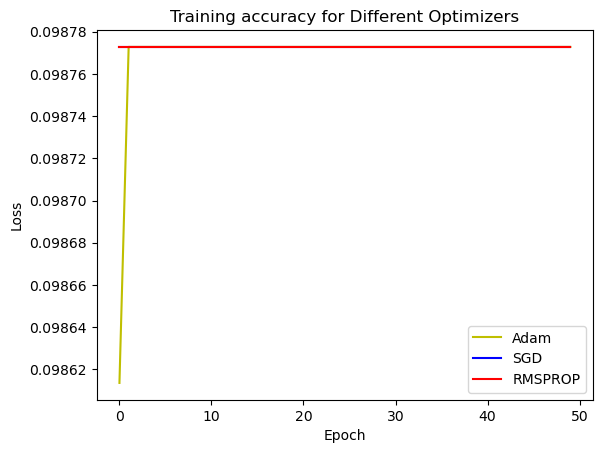

In [27]:
plt.plot(adam_history.history["accuracy"] ,label="Adam",color="y")
plt.plot(sgd_history.history["accuracy"],label = "SGD",color="b" )
plt.plot(rmsprop_history.history["accuracy"], label = "RMSPROP",color="r")
plt.title("Training accuracy for Different Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()